# Lending Club Case Study

**Problem Statement**

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

### Importing the required libraries

In [8]:
# importing required libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Used to increase the display size of rows and columns
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 500)

### Understanding of Data

In [10]:
# Extracting the loan data in a dataframe
loan_df = pd.read_csv("loan.csv")

In [11]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [12]:
# Understanding the type of variables
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [13]:
# Checking the shape of the dataframe
loan_df.shape

(39717, 111)

### Data Handling and Cleaning

In [14]:
# Check total type of loan status available in the data set
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [15]:
# Remove all the rows with Loan Status Current as we are not considering it
# for risk analysis and save the result into a new data frame
loan_df_interim = loan_df[(loan_df.loan_status != "Current")]

In [16]:
# Checking the shape of the new dataframe
loan_df_interim.shape

(38577, 111)

In [17]:
# Checking the index of the dataframe as we have removed the rows
loan_df_interim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.0+ MB


In [18]:
# Resetting the index to make it sqequential
loan_df_interim.reset_index(inplace = True, drop = True)

In [19]:
# Checking the index again after resetting it
loan_df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 32.7+ MB


In [14]:
# Find the total null values in the data
loan_df_interim.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2386
emp_length                         1033
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12529
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [20]:
# Find the percentage of null values for all the columns
missing_value_perc = loan_df_interim.isnull().mean() * 100

In [21]:
# Printing missing_value_perc in Descending order
missing_value_perc.sort_values(ascending = False)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [22]:
# Drop all the columns which has missing value percentage >= 70
# and save the value in the new dataframe
loan_df_clean = loan_df_interim.loc[:, missing_value_perc < 70]

In [23]:
# Understanding the variables after removing the columns
loan_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [24]:
# Again finding the null value percentage on the new dataframe
result_clean_null_perc = loan_df_clean.isnull().mean() * 100

In [25]:
# Printing result_clean_null_perc in Ascending order
result_clean_null_perc.sort_values(ascending = True)

id                             0.000000
earliest_cr_line               0.000000
open_acc                       0.000000
pub_rec                        0.000000
revol_bal                      0.000000
total_acc                      0.000000
initial_list_status            0.000000
out_prncp                      0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
delinq_2yrs                    0.000000
total_pymnt_inv                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000
policy_code                    0.000000
application_type               0.000000
acc_now_delinq                 0.000000
delinq_amnt                    0.000000
total_rec_prncp                0.000000
dti                            0.000000
inq_last_6mths                 0.000000
zip_code                       0.000000


In [26]:
# To find any duplicate values in the data
loan_df_clean.duplicated().sum()

0

**Understanding the Columns**

Finding and Dropping the columns which does not have variation in the data and does not impact our analysis

In [27]:
# Find the type of values in policy_code
loan_df_clean.policy_code.value_counts()

policy_code
1    38577
Name: count, dtype: int64

In [28]:
# Dropping policy_code as it's not a driving variable in the analytics
loan_df_clean.drop("policy_code", axis = 1, inplace = True)

In [29]:
# Find the type of values in application_type
loan_df_clean.application_type

0        INDIVIDUAL
1        INDIVIDUAL
2        INDIVIDUAL
3        INDIVIDUAL
4        INDIVIDUAL
            ...    
38572    INDIVIDUAL
38573    INDIVIDUAL
38574    INDIVIDUAL
38575    INDIVIDUAL
38576    INDIVIDUAL
Name: application_type, Length: 38577, dtype: object

In [30]:
# Dropping the application_type column as all the data contains the same value
# INDIVIDUAL
loan_df_clean.drop("application_type", axis = 1, inplace = True)

In [31]:
# Find the type of values in out_prncp_inv
loan_df_clean.out_prncp_inv.value_counts()

out_prncp_inv
0.0    38577
Name: count, dtype: int64

In [32]:
# Dropping the out_prncp_inv column as all the data contains the same value i.e. 0
loan_df_clean.drop("out_prncp_inv", axis = 1, inplace = True)

In [33]:
# Find the type of values in out_prncp
loan_df_clean.out_prncp.value_counts()

out_prncp
0.0    38577
Name: count, dtype: int64

In [34]:
# Dropping the out_prncp column as all the data contains the same value i.e. 0
# as there is no variation
loan_df_clean.drop("out_prncp", axis = 1, inplace = True)

In [35]:
# Find the type of values in tax_liens
loan_df_clean.tax_liens.value_counts()

tax_liens
0.0    38538
Name: count, dtype: int64

In [36]:
# Dropping the tax_liens column as most of the data contains the same value i.e. 0
# as there is no variation
loan_df_clean.drop("tax_liens", axis = 1, inplace = True)

In [37]:
# Find the type of values in chargeoff_within_12_mths
loan_df_clean.chargeoff_within_12_mths.value_counts()

chargeoff_within_12_mths
0.0    38521
Name: count, dtype: int64

In [38]:
# Dropping the chargeoff_within_12_mths column as most of the data contains the same value i.e. 0
# as there is no variation
loan_df_clean.drop("chargeoff_within_12_mths", axis = 1, inplace = True)

In [39]:
# Find the type of values in delinq_amnt
loan_df_clean.delinq_amnt.value_counts()

delinq_amnt
0    38577
Name: count, dtype: int64

In [40]:
# Dropping the delinq_amnt column as all the data contains the same value i.e. 0
# as there is no variation
loan_df_clean.drop("delinq_amnt", axis = 1, inplace = True)

In [41]:
# Find the type of values in collections_12_mths_ex_med
loan_df_clean.collections_12_mths_ex_med.value_counts()

collections_12_mths_ex_med
0.0    38521
Name: count, dtype: int64

In [42]:
# Dropping the collections_12_mths_ex_med column as most of the data contains the same value i.e. 0
# as there is no variation
loan_df_clean.drop("collections_12_mths_ex_med", axis = 1, inplace = True)

In [43]:
# Dropping the url column as it does not impact on risk analysis
loan_df_clean.drop("url", axis = 1, inplace = True)

In [44]:
# Dropping the zip_code column as we are not considering it for risk analysis
loan_df_clean.drop("zip_code", axis = 1, inplace = True)

In [45]:
# Find the type of values in initial_list_status
loan_df_clean.initial_list_status.value_counts()

initial_list_status
f    38577
Name: count, dtype: int64

In [46]:
#Dropping the initial_list_status column as all the data contains the same value i.e. f
#as there is no variation
loan_df_clean.drop("initial_list_status", axis = 1, inplace = True)

In [47]:
# Find the type of values in acc_now_delinq
loan_df_clean.acc_now_delinq.value_counts()

acc_now_delinq
0    38577
Name: count, dtype: int64

In [48]:
#Dropping the acc_now_delinq column as all the data contains the same value i.e. 0
#as there is no variation
loan_df_clean.drop("acc_now_delinq", axis = 1, inplace = True)

In [49]:
# Dropping the addr_state column as we are not considering it for risk analysis
loan_df_clean.drop("addr_state", axis = 1, inplace = True)

In [50]:
# Dropping the funded_amnt_inv column as we are not considering it for risk analysis
loan_df_clean.drop("funded_amnt_inv", axis = 1, inplace = True)

In [51]:
# Dropping the desc column as we are not considering it for risk analysis
loan_df_clean.drop("desc", axis = 1, inplace = True)

In [52]:
# Checing the dataframe info after dropping unwanted columns
loan_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   term                     38577 non-null  object 
 5   int_rate                 38577 non-null  object 
 6   installment              38577 non-null  float64
 7   grade                    38577 non-null  object 
 8   sub_grade                38577 non-null  object 
 9   emp_title                36191 non-null  object 
 10  emp_length               37544 non-null  object 
 11  home_ownership           38577 non-null  object 
 12  annual_inc               38577 non-null  float64
 13  verification_status      38577 non-null  object 
 14  issue_d               

### Data Imputation and Manipulation

Imputing the values in the columns where we have missing values and converting the datatype of the columns as required.

In [53]:
# Find the type of values in emp_title
loan_df_clean.emp_title.value_counts()

emp_title
US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: count, Length: 28027, dtype: int64

In [54]:
# Find the most used value in emp_title
loan_df_clean.emp_title.mode()

0    US Army
Name: emp_title, dtype: object

In [55]:
# impute emp_title having null values with the most used title name
loan_df_clean.emp_title.fillna(loan_df_clean.emp_title.mode()[0], inplace = True)

In [56]:
# Find the most used value in title
loan_df_clean.title.mode()

0    Debt Consolidation
Name: title, dtype: object

In [57]:
# Impute title having null values with the most used title name
loan_df_clean.title.fillna(loan_df_clean.title.mode()[0], inplace = True)

In [58]:
# Find the most used value in revol_util
loan_df_clean.revol_util.mode()

0    0%
Name: revol_util, dtype: object

In [59]:
# Impute revol_util having null values with the most used revol_util value 
# before converting it to a float value as it is in percentage
loan_df_clean.revol_util.fillna(loan_df_clean.revol_util.mode()[0], inplace = True)

In [60]:
# Find the total null values in the revol_util column
loan_df_clean.revol_util.isnull().sum()

0

In [61]:
# Remove the "%" symbol from the revol_util column values
loan_df_clean.revol_util = loan_df_clean.revol_util.apply(lambda x : x.replace("%", ""))

In [62]:
# Converting the value to float as it is a percentage value
loan_df_clean.revol_util = loan_df_clean.revol_util.astype("float64")

In [63]:
# Checking the revol_util datatype after conversion
loan_df_clean.revol_util.info()

<class 'pandas.core.series.Series'>
RangeIndex: 38577 entries, 0 to 38576
Series name: revol_util
Non-Null Count  Dtype  
--------------  -----  
38577 non-null  float64
dtypes: float64(1)
memory usage: 301.5 KB


In [64]:
# Find the type of values in last_pymnt_d
loan_df_clean.last_pymnt_d.value_counts()

last_pymnt_d
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
Mar-12     844
Aug-14     832
Jan-14     832
Aug-12     832
Oct-12     826
Mar-14     824
Jul-14     820
Oct-14     808
Feb-14     792
Jan-13     784
Dec-13     780
Jun-14     778
Jul-13     776
Sep-12     761
Jul-12     741
Nov-12     740
May-12     736
Feb-12     735
Apr-12     734
Aug-13     727
Dec-12     707
Jun-12     702
Sep-14     693
Oct-13     692
Jun-13     691
Sep-13     684
May-14     682
Apr-14     674
Nov-13     671
Nov-14     589
Jan-12     546
Dec-11     544
Mar-11     488
Nov-11     454
Oct-11     453
Sep-11     450
Aug-11     428
Apr-11     420
Jul-11     394
May-11     386
Jun-11     376
Feb-11     337
Jan-15     332
Jan-11     266
Dec-10     253
Jul-15     250
Nov-15     227
Jun-15     220
Oct-10     216
Mar-16     216
Aug-15     210
Sep-15     202
Nov-10     195
Jul-10     188
Oct-15     186
Jan-16     183
Mar-15     182
Dec-15     176
Sep-10     176
Apr-16     173
Feb-16     1

In [65]:
# Converting last_pymnt_d datatype from object to datetime to make it useful for analysis
loan_df_clean.last_pymnt_d = pd.to_datetime(loan_df_clean.last_pymnt_d, format='%b-%y')

In [66]:
# Checking the last_pymnt_d datatype after conversion
loan_df_clean.last_pymnt_d.info()

<class 'pandas.core.series.Series'>
RangeIndex: 38577 entries, 0 to 38576
Series name: last_pymnt_d
Non-Null Count  Dtype         
--------------  -----         
38506 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 301.5 KB


In [67]:
# Find the total null values in the last_pymnt_d column
loan_df_clean.last_pymnt_d.isnull().sum()

71

In [68]:
# Find the type of values in issue_d
loan_df_clean.issue_d.value_counts()

issue_d
Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [69]:
# Converting issue_d datatype from object to datetime
loan_df_clean.issue_d = pd.to_datetime(loan_df_clean.issue_d, format='%b-%y')

In [70]:
# Checking the issue_d datatype after conversion
loan_df_clean.issue_d.info()

<class 'pandas.core.series.Series'>
RangeIndex: 38577 entries, 0 to 38576
Series name: issue_d
Non-Null Count  Dtype         
--------------  -----         
38577 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 301.5 KB


In [71]:
# Find the total null values in the last_pymnt_d column for column loan_status Charged Off
loan_df_clean[(loan_df_clean.last_pymnt_d.isnull()) & (loan_df_clean.loan_status == "Charged Off")].shape

(71, 40)

In [72]:
# Find the total null values in the last_pymnt_d column for column loan_status Fully Paid
loan_df_clean[(loan_df_clean.last_pymnt_d.isnull()) & (loan_df_clean.loan_status == "Fully Paid")].shape

(0, 40)

In [73]:
# Impute last_pymnt_d having null values with a time before the 
# loan status was changed to Charged Off i.e. 3 months from the loan issued date
loan_df_clean.loc[(loan_df_clean.last_pymnt_d.isnull()) & 
(loan_df_clean.loan_status == "Charged Off"), 'last_pymnt_d'] = loan_df_clean.issue_d + pd.DateOffset(months=3)

In [74]:
# Find the total null values in the last_pymnt_d column after imputing
loan_df_clean[loan_df_clean.last_pymnt_d.isnull()].shape

(0, 40)

In [75]:
# Find the most used value in emp_length
loan_df_clean.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [76]:
# Impute emp_length having null values with the most used value of emp_length 
loan_df_clean.emp_length.fillna(loan_df_clean.emp_length.mode()[0], inplace = True)

In [77]:
# Find the statistical values of pub_rec_bankruptcies
loan_df_clean.pub_rec_bankruptcies.describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [78]:
# Impute pub_rec_bankruptcies having null values with it's median
loan_df_clean.pub_rec_bankruptcies.fillna(loan_df_clean.pub_rec_bankruptcies.median(), inplace = True)

In [79]:
# Find the type of values in last_credit_pull_d
loan_df_clean.last_credit_pull_d.value_counts()

last_credit_pull_d
May-16    9333
Apr-16    2393
Mar-16    1122
Feb-13     843
Feb-16     733
Jan-16     657
Dec-15     647
Mar-13     576
Mar-14     564
Dec-14     562
Jul-14     555
Sep-14     546
Jul-15     535
Feb-14     531
Nov-15     529
Oct-14     529
Aug-14     522
Jan-14     516
Sep-15     512
Oct-15     502
Nov-14     497
Apr-14     494
Nov-13     473
May-14     473
Jun-14     465
May-13     448
Jan-15     436
Apr-13     425
May-15     422
Dec-13     422
Aug-15     422
Oct-13     416
Nov-12     404
Jul-13     396
Sep-12     391
Sep-13     390
Apr-15     388
Aug-12     377
Jun-15     375
Dec-12     374
Mar-15     371
Aug-13     370
Jun-13     370
Feb-12     368
Feb-15     358
Mar-12     338
Oct-12     332
May-12     324
Apr-12     308
Jun-12     308
Jul-12     297
Jan-12     258
Mar-11     257
Aug-11     254
Dec-11     245
Nov-11     201
May-11     193
Jun-11     165
Sep-11     157
Jul-11     156
Feb-11     151
Oct-11     148
Apr-11     135
Jan-11     129
Dec-10     111
Jul-10

In [80]:
# Converting last_credit_pull_d datatype from object to datetime
loan_df_clean.last_credit_pull_d = pd.to_datetime(loan_df_clean.last_credit_pull_d, format='%b-%y')

In [81]:
# Checking the issue_d datatype after conversion
loan_df_clean.last_credit_pull_d.info()

<class 'pandas.core.series.Series'>
RangeIndex: 38577 entries, 0 to 38576
Series name: last_credit_pull_d
Non-Null Count  Dtype         
--------------  -----         
38575 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 301.5 KB


In [82]:
# Impute last_credit_pull_d having null values with it's issue_d
# assuming that the credit pulls happens around the same time when the loan is issued
loan_df_clean.last_credit_pull_d.fillna(loan_df_clean.issue_d, inplace = True)

In [83]:
# Find the statistical values of mths_since_last_delinq
loan_df_clean.mths_since_last_delinq.describe()

count    13672.000000
mean        35.882534
std         22.028093
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [84]:
# Impute mths_since_last_delinq having null values with it's median
loan_df_clean.mths_since_last_delinq.fillna(loan_df_clean.mths_since_last_delinq.median(), inplace = True)

In [85]:
# Checing the dataframe info after imputing columns
loan_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38577 non-null  int64         
 1   member_id                38577 non-null  int64         
 2   loan_amnt                38577 non-null  int64         
 3   funded_amnt              38577 non-null  int64         
 4   term                     38577 non-null  object        
 5   int_rate                 38577 non-null  object        
 6   installment              38577 non-null  float64       
 7   grade                    38577 non-null  object        
 8   sub_grade                38577 non-null  object        
 9   emp_title                38577 non-null  object        
 10  emp_length               38577 non-null  object        
 11  home_ownership           38577 non-null  object        
 12  annual_inc               38577 n

In [134]:
# Remove the "%" symbol from the int_rate column values
loan_df_clean.int_rate = loan_df_clean.int_rate.apply(lambda x : x.replace("%", ""))

In [135]:
# Converting the value of int_rate to float as it is a percentage value
loan_df_clean.int_rate = loan_df_clean.int_rate.astype("float64")

In [136]:
# Checking the int_rate datatype after conversion
loan_df_clean.int_rate.info()

<class 'pandas.core.series.Series'>
RangeIndex: 34879 entries, 0 to 34878
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
34879 non-null  float64
dtypes: float64(1)
memory usage: 272.6 KB


In [137]:
# Remove the " months" string from the term column values
loan_df_clean.term = loan_df_clean.term.apply(lambda x : x.replace(" months", ""))

In [138]:
# Converting the term value to integer
loan_df_clean.term = loan_df_clean.term.astype("int64")

In [139]:
# Checking the term datatype after conversion
loan_df_clean.term.info()

<class 'pandas.core.series.Series'>
RangeIndex: 34879 entries, 0 to 34878
Series name: term
Non-Null Count  Dtype
--------------  -----
34879 non-null  int64
dtypes: int64(1)
memory usage: 272.6 KB


In [86]:
# Find the total null values in the data after imputing and data manipulation
loan_df_clean.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
title                      0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
mths_since_last_delinq     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries    

In [87]:
# Save the clean loan data to csv just for the reference
loan_df_clean.to_csv("loan_data_clean.csv")

### Outlier Analysis using Boxplot

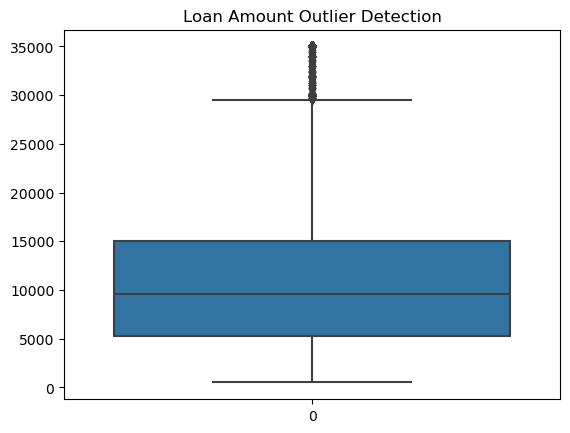

In [89]:
# Outlier detection for loan_amnt
sns.boxplot(loan_df_clean.loan_amnt)
plt.title("Loan Amount Outlier Detection")
plt.show()

In [90]:
# Using IQR -> Inter Quartile Range method we are going to remove the outliers
# Find q1 i.e. the 25th percentile fo the value
q1 = loan_df_clean["loan_amnt"].quantile(0.25)

In [91]:
# Find q3 i.e. the 75th percentile fo the value
q3 = loan_df_clean["loan_amnt"].quantile(0.75)

In [92]:
# Find IQR
iqr = q3 - q1

In [93]:
# Print the IQR value
iqr

9700.0

In [94]:
# Find the lower range
lower_range = q1 - 1.5 * iqr

In [95]:
# Find the upper range
upper_range = q3 + 1.5 * iqr

In [96]:
# Save the outlier data in the new dataframe
outlier_iqr_loan_amnt = loan_df_clean[(loan_df_clean["loan_amnt"] < lower_range) | (loan_df_clean["loan_amnt"] > upper_range)]

In [97]:
# Print the shape of the outlier data
outlier_iqr_loan_amnt.shape

(1088, 40)

In [98]:
# Print the shape of the clean data
loan_df_clean.shape

(38577, 40)

In [99]:
# Dropping the outlier data for the loan_amnt
loan_df_clean = loan_df_clean.drop(outlier_iqr_loan_amnt.index)

In [100]:
# Print the shape of the data after dropping the outliers
loan_df_clean.shape

(37489, 40)

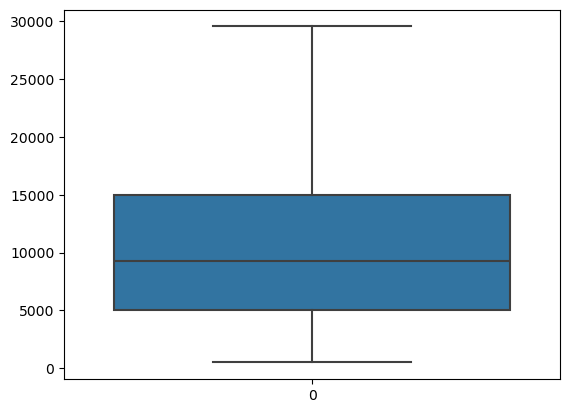

In [102]:
# Again create a boxPlot to verify the outliers
sns.boxplot(loan_df_clean.loan_amnt)
plt.show()

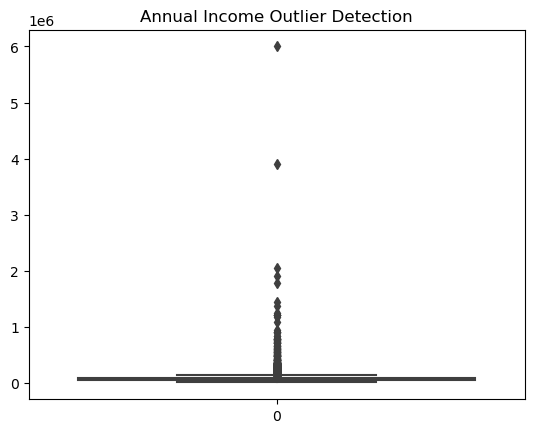

In [103]:
# Outlier detection for annual_inc
sns.boxplot(loan_df_clean["annual_inc"])
plt.title("Annual Income Outlier Detection")
plt.show()

In [104]:
# Using IQR -> Inter Quartile Range method we are going to remove the outliers
# Find q1 i.e. the 25th percentile fo the value
q1 = loan_df_clean["annual_inc"].quantile(0.25)

In [105]:
# Find q3 i.e. the 75th percentile fo the value
q3 = loan_df_clean["annual_inc"].quantile(0.75)

In [106]:
# Find IQR
iqr = q3 - q1

In [107]:
# Print the IQR value
iqr

40000.0

In [108]:
# Find the lower range
lower_range = q1 - 1.5 * iqr

In [109]:
# Find the upper range
upper_range = q3 + 1.5 * iqr

In [110]:
# Save the outlier data in the new dataframe
outlier_iqr_ann_inc = loan_df_clean[(loan_df_clean["annual_inc"] < lower_range) | (loan_df_clean["annual_inc"] > upper_range)]

In [111]:
# Print the shape of the outlier data
outlier_iqr_ann_inc.shape

(1661, 40)

In [112]:
# Print the shape of the clean data
loan_df_clean.shape

(37489, 40)

In [113]:
# Dropping the outlier data for the loan_amnt
loan_df_clean = loan_df_clean.drop(outlier_iqr_ann_inc.index)

In [114]:
# Print the shape of the data after dropping the outliers
loan_df_clean.shape

(35828, 40)

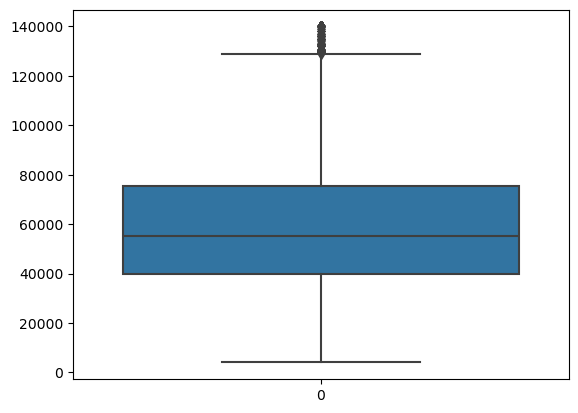

In [115]:
# Again create a boxPlot to verify the outliers
sns.boxplot(loan_df_clean.annual_inc)
plt.show()

In [116]:
# As we can see in the above boxPlot still there are outliers in the data
# For removing the remaining outliers we would consider only the values < 125000 as the annual income
loan_df_clean = loan_df_clean[loan_df_clean.annual_inc < 125000]

In [117]:
# Print the shape of the data after dropping the extra rows
loan_df_clean.shape

(34879, 40)

In [118]:
# Checking the index of the dataframe as we have removed the rows
loan_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34879 entries, 0 to 38576
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       34879 non-null  int64         
 1   member_id                34879 non-null  int64         
 2   loan_amnt                34879 non-null  int64         
 3   funded_amnt              34879 non-null  int64         
 4   term                     34879 non-null  object        
 5   int_rate                 34879 non-null  object        
 6   installment              34879 non-null  float64       
 7   grade                    34879 non-null  object        
 8   sub_grade                34879 non-null  object        
 9   emp_title                34879 non-null  object        
 10  emp_length               34879 non-null  object        
 11  home_ownership           34879 non-null  object        
 12  annual_inc               34879 non-nu

In [119]:
# Resetting the index to make it sqequential
loan_df_clean.reset_index(inplace = True, drop = True)

In [121]:
# Checking the index again after resetting it
loan_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34879 entries, 0 to 34878
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       34879 non-null  int64         
 1   member_id                34879 non-null  int64         
 2   loan_amnt                34879 non-null  int64         
 3   funded_amnt              34879 non-null  int64         
 4   term                     34879 non-null  object        
 5   int_rate                 34879 non-null  object        
 6   installment              34879 non-null  float64       
 7   grade                    34879 non-null  object        
 8   sub_grade                34879 non-null  object        
 9   emp_title                34879 non-null  object        
 10  emp_length               34879 non-null  object        
 11  home_ownership           34879 non-null  object        
 12  annual_inc               34879 n

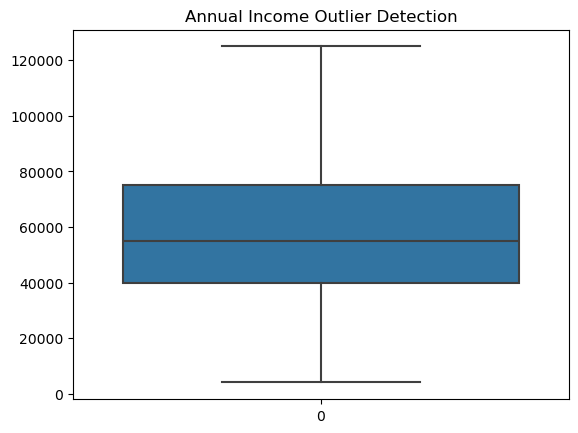

In [123]:
# Again create a boxPlot to verify the outliers
# after removing extra rows
sns.boxplot(loan_df_clean.annual_inc)
plt.title("Annual Income Outlier Detection")
plt.show()

### Univariate Analysis

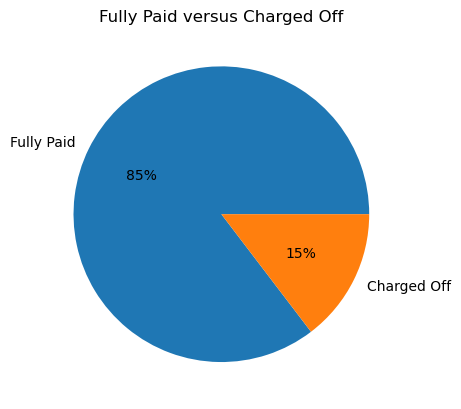

In [126]:
# Univariate Analysis
# Pie Chart to find the percentage of "Charged Off" and "Fully Paid" loan status
plt.pie(loan_df_clean.loan_status.value_counts(), labels = ["Fully Paid", "Charged Off"], autopct='%.0f%%')
plt.title("Fully Paid versus Charged Off")
plt.show()

In [124]:
# Saving the data for only "Charged Off" loan status in a new dataFrame
loan_df_clean_charged_off = loan_df_clean[loan_df_clean.loan_status == "Charged Off"]

In [125]:
# Print the shape of the new dataFrame
loan_df_clean_charged_off.shape

(5104, 40)

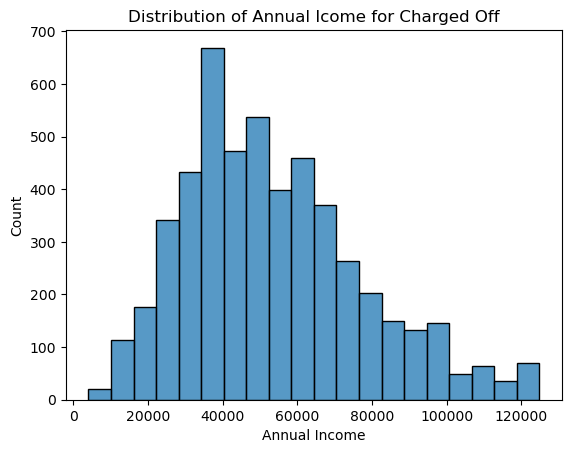

In [129]:
# Univariate Analysis
# annual_inc -> Annual Income
# (one of the driving variables for loan default)
# People between 30k to 40K annual income could be considered
# as high risk borrowers
sns.histplot(loan_df_clean_charged_off["annual_inc"], bins = 20)
plt.title("Distribution of Annual Icome for Charged Off")
plt.xlabel("Annual Income")
plt.show()

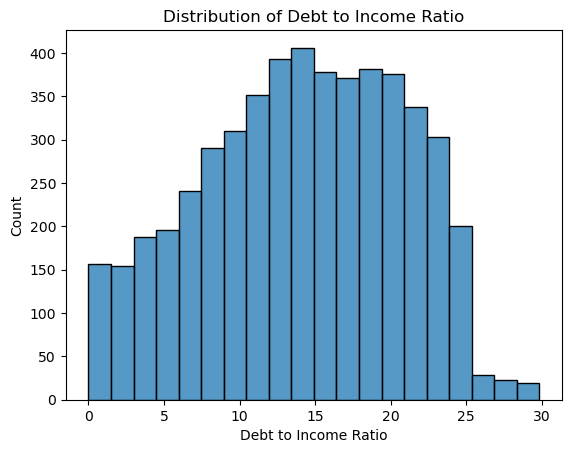

In [130]:
# Univariate Analysis
# dti -> Debt to Income Ratio
# (one of the driving variables for loan default)
# People between 10 to 15 debt to income ratio could be considered
# as high risk borrowers
sns.histplot(loan_df_clean_charged_off["dti"], bins = 20)
plt.title("Distribution of Debt to Income Ratio")
plt.xlabel("Debt to Income Ratio")
plt.show()

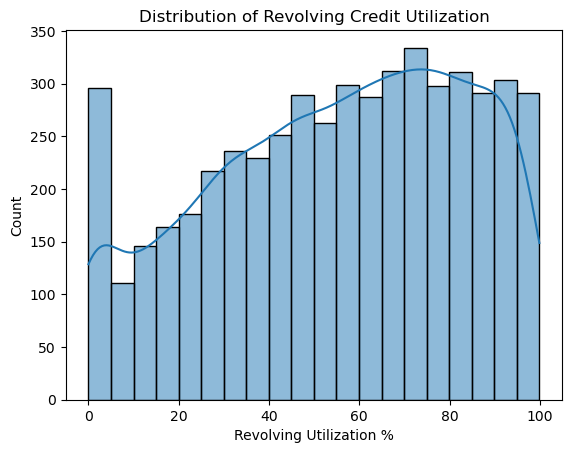

In [131]:
# revol_util -> Revovling Utilization percentage
# (one of the driving variables for loan default)
# The people with very less credit utilization
# and people with very high credit utilization
# both are high risk borrowers
sns.histplot(loan_df_clean_charged_off.revol_util, bins = 20, kde = True)
plt.title("Distribution of Revolving Credit Utilization")
plt.xlabel("Revolving Utilization %")
plt.show()

### Bivariate Analysis

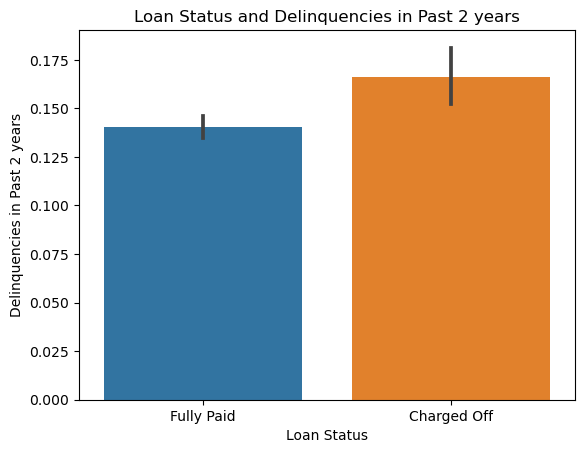

In [132]:
# Bivariate Analysis
# delinq_2yrs variable could be one of the driving variables to say that
# people with more Delinquencies are high risk borrowers
sns.barplot(x = loan_df_clean["loan_status"], y = loan_df_clean["delinq_2yrs"])
plt.title("Loan Status and Delinquencies in Past 2 years")
plt.xlabel("Loan Status")
plt.ylabel("Delinquencies in Past 2 years")
plt.show()

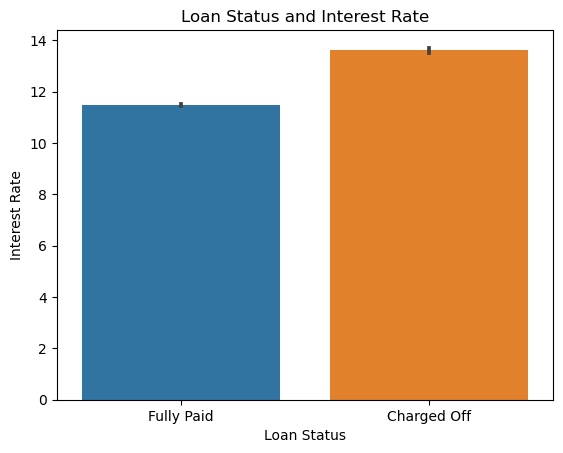

In [140]:
# Bivariate Analysis
# People with high interest rate are more likely to default on  their loan
sns.barplot(x = loan_df_clean["loan_status"], y = loan_df_clean["int_rate"])
plt.title("Loan Status and Interest Rate")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")
plt.show()

### Derived Metrics

In [141]:
# Creating a dervied integer variable column for people who have defaulted or not
# value 1 for Charged off and 0 for Fully Paid to make the Analysis easier
# (one of the driving variables for loan default)
loan_df_clean["default"] = loan_df_clean.loan_status.apply(lambda x : 1 if x == "Charged Off" else 0)

In [142]:
# Check the dataframe after adding the derived column default
loan_df_clean.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,default
0,1077501,1296599,5000,5000,36,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,27.65,0,Jan-85,1,34.0,3,0,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,0
1,1077430,1314167,2500,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,1.00,0,Apr-99,5,34.0,3,0,1687,9.4,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1
2,1077175,1313524,2400,2400,36,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,8.72,0,Nov-01,2,34.0,2,0,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,0
3,1076863,1277178,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,20.00,0,Feb-96,1,35.0,10,0,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,0
4,1075269,1311441,5000,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,My wedding loan I promise to pay back,11.20,0,Nov-04,3,34.0,9,0,7963,28.3,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,0


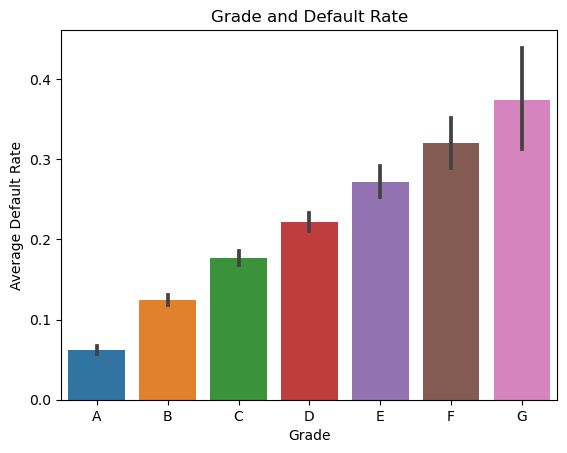

In [145]:
# Bivariate Analysis
# Using grade and default column
# As we can clearly see from the bar plot that people
# with grade A and B are the lowest risk borrowers
# and as the grade goes from C to G
# the risk of borrowers keeps increasing
# and people with grade "G" are highest risk borrowers
sns.barplot(x = loan_df_clean["grade"].sort_values(), y = loan_df_clean["default"])
plt.title("Grade and Default Rate")
plt.xlabel("Grade")
plt.ylabel("Average Default Rate")
plt.show()

In [146]:
# Creating a group by of purpose with avergae value of default column
# to find out which purpose has the highest default rate
purpose_default_rate = loan_df_clean.groupby('purpose')['default'].mean().reset_index()

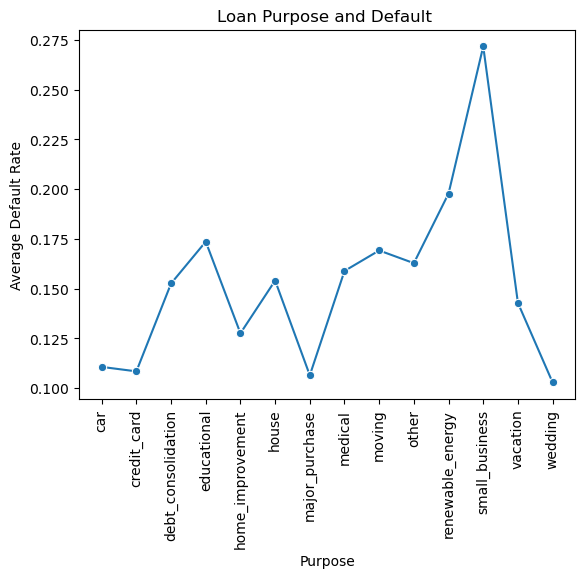

In [147]:
# Bivariate Analysis
# Using purpose and default column
# As we can see clearly from the line plot
# People with the purpose of small_business
# are the high risk borrowers
sns.lineplot(x='purpose', y='default', data=purpose_default_rate, marker='o')
plt.title("Loan Purpose and Default ")
plt.xlabel("Purpose")
plt.ylabel("Average Default Rate")
plt.xticks(rotation=90)
plt.show()

In [148]:
# Creating a group by of home_ownership with avergae value of default column
# to find out which home_ownership has the highest default rate
home_ownership_default_rate = loan_df_clean.groupby('home_ownership')['default'].mean().reset_index()

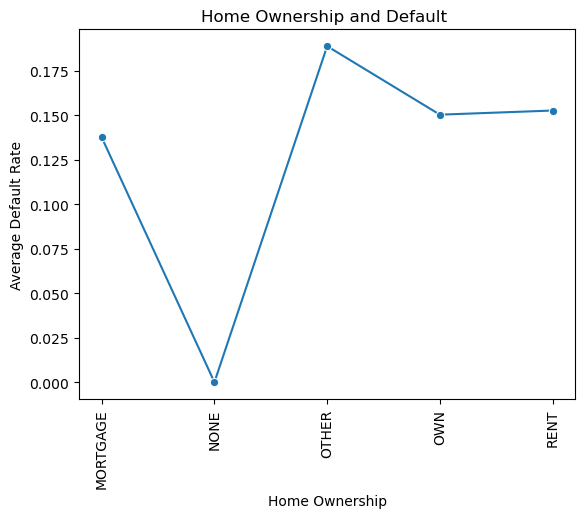

In [149]:
# Bivariate Analysis
# Using home_ownership and default column
# As we can see clearly from the line plot
# People with the home_ownership of OTHER
# are the high risk borrowers
sns.lineplot(x='home_ownership', y='default', data=home_ownership_default_rate, marker='o')
plt.title("Home Ownership and Default ")
plt.xlabel("Home Ownership")
plt.ylabel("Average Default Rate")
plt.xticks(rotation=90)
plt.show()

In [150]:
# Creating a group by of verification_status with avergae value of default column
# to find out which verification_status has the highest default rate
verification_status_default_rate = loan_df_clean.groupby('verification_status')['default'].mean().reset_index()

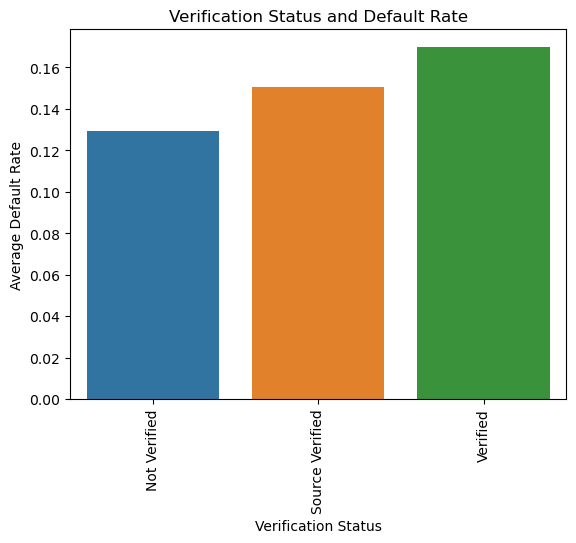

In [151]:
# Bivariate Analysis
# Using verification_status and default column
# As we can clearly see from the bar plot
# Surprisingly the people with Verified status are defaulting the most
sns.barplot(x='verification_status', y='default', data=verification_status_default_rate)
plt.title("Verification Status and Default Rate")
plt.xlabel("Verification Status")
plt.ylabel("Average Default Rate")
plt.xticks(rotation=90)
plt.show()

### Multivariate Analysis

In [162]:
# Creating a list of numerical columns to do the Multivariate Analysis between them
numerical_cols = [
    'loan_amnt', 'funded_amnt', 'int_rate',
    'annual_inc', 'dti', 'revol_util', 'open_acc', 'total_acc',
    'delinq_2yrs', 'mths_since_last_delinq', 'inq_last_6mths'
]

In [163]:
# Finding the correlation between the different numerical attributes of the data
# and saving the data in a new dataFrame
loan_df_cor = loan_df_clean[numerical_cols].corr()

In [164]:
# Printing the correlation
loan_df_cor

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_util,open_acc,total_acc,delinq_2yrs,mths_since_last_delinq,inq_last_6mths
loan_amnt,1.000000,0.981426,0.251202,0.369451,0.097078,0.078828,0.164302,0.225195,-0.038877,0.010160,-0.000468
funded_amnt,0.981426,1.000000,0.259529,0.365921,0.096327,0.083675,0.161605,0.219302,-0.039043,0.010652,-0.000227
int_rate,0.251202,0.259529,1.000000,0.022701,0.105921,0.467799,-0.020339,-0.084856,0.156110,-0.011588,0.133011
annual_inc,0.369451,0.365921,0.022701,1.000000,-0.065270,0.044157,0.264905,0.380348,0.028047,0.006687,0.029848
dti,0.097078,0.096327,0.105921,-0.065270,1.000000,0.275606,0.298104,0.247692,-0.029805,0.035383,0.008418
revol_util,0.078828,0.083675,0.467799,0.044157,0.275606,1.000000,-0.099640,-0.081111,-0.042786,0.059437,-0.066727
open_acc,0.164302,0.161605,-0.020339,0.264905,0.298104,-0.099640,1.000000,0.683392,0.016754,0.020232,0.091460
total_acc,0.225195,0.219302,-0.084856,0.380348,0.247692,-0.081111,0.683392,1.000000,0.068018,0.019695,0.107889
delinq_2yrs,-0.038877,-0.039043,0.156110,0.028047,-0.029805,-0.042786,0.016754,0.068018,1.000000,-0.486554,0.008089
mths_since_last_delinq,0.010160,0.010652,-0.011588,0.006687,0.035383,0.059437,0.020232,0.019695,-0.486554,1.000000,-0.001001


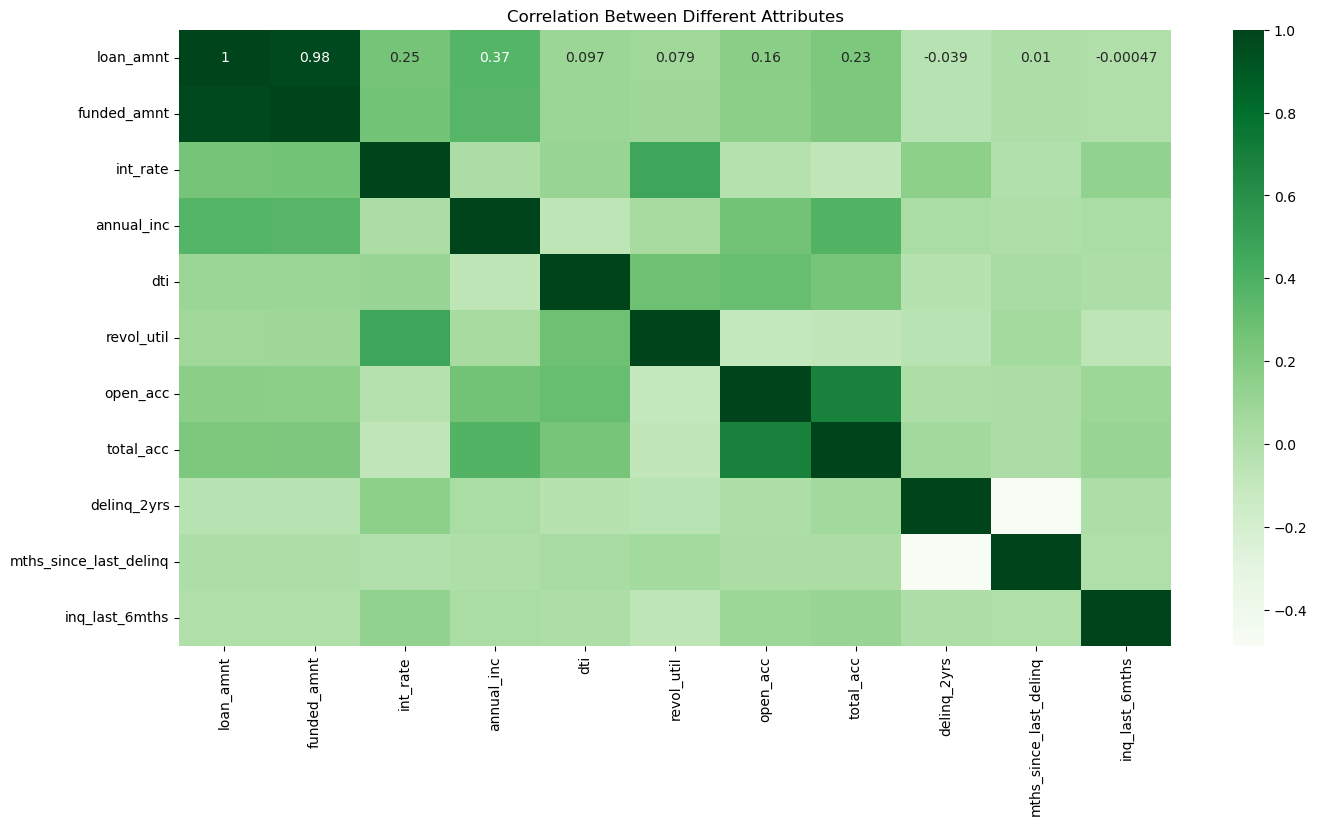

In [166]:
# Multivariate Analysis
# Creating a Heatmap with the correlation data
plt.figure(figsize=(16, 8))
sns.heatmap(loan_df_cor, cmap = "Greens", annot = True)
plt.title("Correlation Between Different Attributes")
plt.show()

#### Understanding of Multivariate Analysis
The moderate negative correlation (-0.48) between delinq_2yrs and mths_since_last_delinq suggests that borrowers who have gone longer without a delinquency are less likely to have had many delinquencies recently, which could indicate lower credit risk.

The moderate positive correlation (0.46) between int_rate and revol_util suggests that borrowers who use more of their available credit are typically charged higher interest rates. This relationship highlights the use of revol_util as a risk factor in Lending Club, where borrowers with higher revolving credit utilization are considered riskier and therefore face higher costs for borrowing.